In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

(آ)

i

In [3]:
df = pd.read_csv('Heart_Disease_Dataset.csv')
print(f"Dataset size: {df.shape[0]} samples and {df.shape[1]} features")


Dataset size: 1190 samples and 12 features


ii

In [4]:
common_features = set(df.columns)

for index, row in df.iterrows():
    features = common_features.intersection(row.index)
features.remove('target')

if len(common_features - set(features)) > 0 :
    print('there is deleted feature')
else :
        print("there isn't any deleted feature")

there is deleted feature


iii

In [5]:
eq1 = 0
eq0 = 0
nu_samples = df.shape[0]

for index, row in df.iterrows():
    eq1 += (df['target'][index] == 1)
    eq0 += (df['target'][index] == 0)

class1_dis = eq1 / nu_samples
class0_dis = eq0 / nu_samples

class1_dis - class0_dis


0.05714285714285716

iv

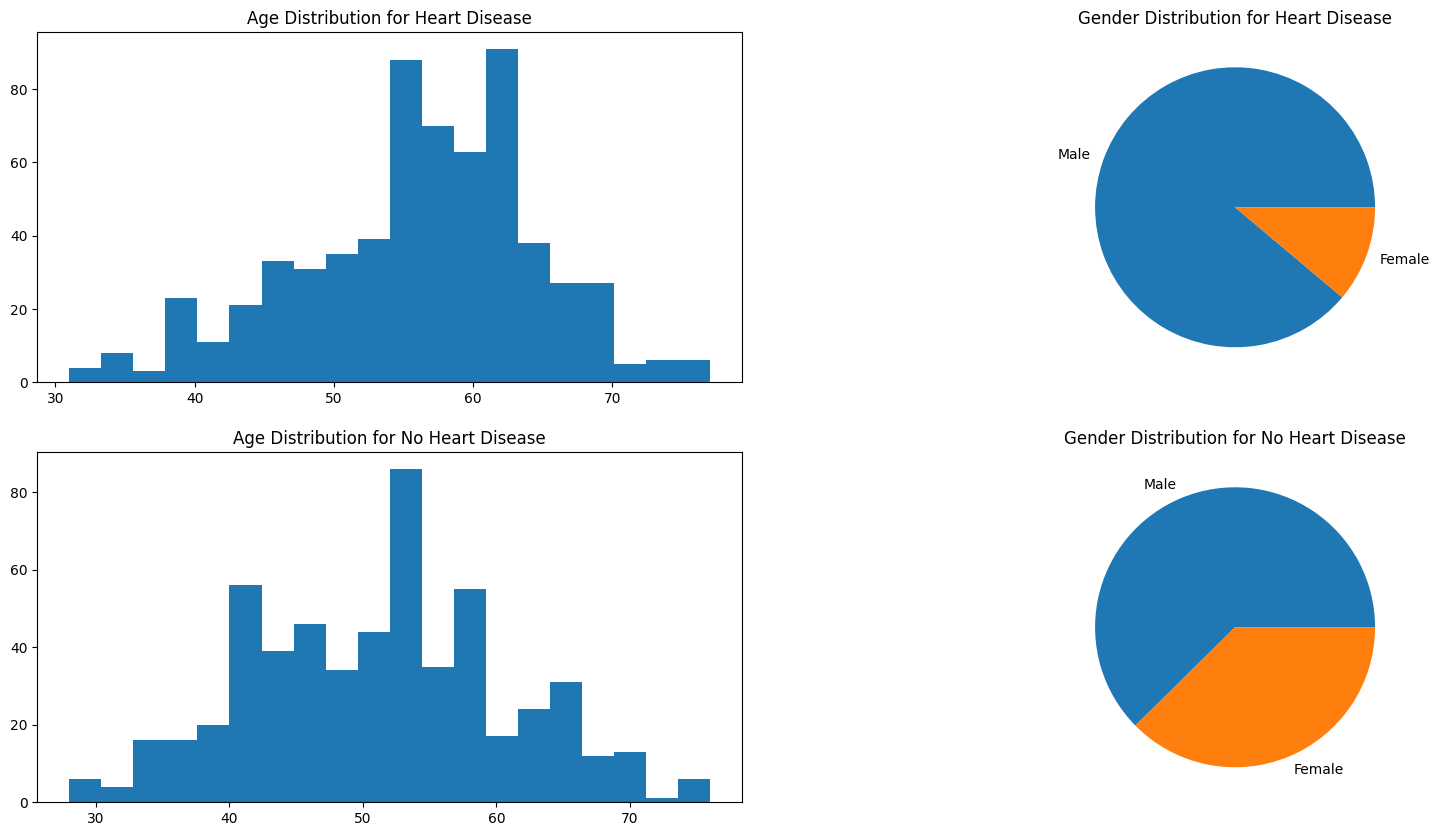

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Plot the distribution of age for people with heart disease
axs[0, 0].hist(df[df['target'] == 1]['age'], bins=20)
axs[0, 0].set_title('Age Distribution for Heart Disease')

# Plot the distribution of gender for people with heart disease
axs[0, 1].pie(df[df['target'] == 1]['sex'].value_counts(), labels=['Male', 'Female'])
axs[0, 1].set_title('Gender Distribution for Heart Disease')

# Plot the distribution of age for people without heart disease
axs[1, 0].hist(df[df['target'] == 0]['age'], bins=20)
axs[1, 0].set_title('Age Distribution for No Heart Disease')

# Plot the distribution of gender for people without heart disease
axs[1, 1].pie(df[df['target'] == 0]['sex'].value_counts(), labels=['Male', 'Female'])
axs[1, 1].set_title('Gender Distribution for No Heart Disease')

plt.show()


(ب)

In [7]:
def Z_test(df,feature):
    threshold = 3
    mean = df[feature].mean()
    std = df[feature].std()
    df['z_score'] = np.abs((df[feature] - mean) / std)
    outliers = df[df['z_score'] > threshold].index
    df = df[df['z_score'] <= threshold]
    df = df.drop('z_score', axis=1)
    return df , list(outliers)

# apply the function for all features
df_Cut = df
Drop = []

for F in features:
    df_Cut , Drop_t= Z_test(df_Cut,F)
    Drop.extend(Drop_t)

print(np.shape(df_Cut))

len(Drop)



(1162, 12)


28

(ج)

In [8]:
def Norm(df, feature):
    df[feature] = df[feature] / df[feature].max()
    return df


for F in features:
    df_Norm = Norm(df_Cut, F)

(د)

In [9]:
Y = df_Norm.iloc[:,-1]
X = df_Norm.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


In [10]:
model_linear = svm.SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
prec_linear = precision_score(y_test, y_pred_linear)
rec_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)
print(f"Linear kernel:\nAccuracy = {acc_linear}, Precision = {prec_linear}, Recall = {rec_linear}, F1-score = {f1_linear}")

Linear kernel:
Accuracy = 0.8080229226361032, Precision = 0.774869109947644, Recall = 0.8604651162790697, F1-score = 0.8154269972451792


In [11]:
gamma = 0
acc_rbf = 0
while 1:
    model_rbf = svm.SVC(kernel='rbf', gamma=gamma)
    model_rbf.fit(X_train, y_train)
    y_pred_rbf = model_rbf.predict(X_test)
    acc = acc_rbf
    acc_rbf = accuracy_score(y_test, y_pred_rbf)
    if (acc > acc_rbf)&(acc_rbf > 0.85) :
        break
    gamma += 0.1


prec_rbf = precision_score(y_test, y_pred_rbf)
rec_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
print(f"RBF kernel:\nAccuracy = {acc_rbf}, Precision = {prec_rbf}, Recall = {rec_rbf}, F1-score = {f1_rbf}")

RBF kernel:
Accuracy = 0.8538681948424068, Precision = 0.8201058201058201, Recall = 0.9011627906976745, F1-score = 0.8587257617728532


In [12]:
degree = 0
acc_poly = 0
while 1 :
    model_poly = svm.SVC(kernel='poly', degree=degree)
    model_poly.fit(X_train, y_train)
    y_pred_poly = model_poly.predict(X_test)
    acc = acc_poly
    acc_poly = accuracy_score(y_test, y_pred_poly)
    if (acc > acc_poly) :
        break
    degree += 1

prec_poly = precision_score(y_test, y_pred_poly)
rec_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)
print(f"Polynominal kernel:\nAccuracy = {acc_poly}, Precision = {prec_poly}, Recall = {rec_poly}, F1-score = {f1_poly}")
degree

Polynominal kernel:
Accuracy = 0.8653295128939829, Precision = 0.8571428571428571, Recall = 0.872093023255814, F1-score = 0.8645533141210374


7